In [ ]:
!pip install tensorflow==2.12
!pip install keras==2.12
!pip install music21
!pip install numpy

### Load

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from xen.visualise import plotPart, plotSparseNoteSequence
from xen.data.SongData import SongDataSet

data_dir = "../../../ai/trainingdata/music/mutopia_guitar/"

dataset = SongDataSet()
dataset.loadMidiDir(data_dir)


Loading 385 files


IntProgress(value=0, max=385)

Label(value='')

/Users/rob/anaconda3/envs/tf/lib/python3.11/site-packages/music21/midi/translate.py:863: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=0, channel=None, data=b'\xfe\xff\x00S\x00i\x00x\x00 \x00P\x00e\x00t\x00i\x00t\x00e\x00s\x00 \x00P\x00i\x00\xe8\x00c\x00e\x00s'>; getting generic Instrument
  warnings.warn(


Loaded 385 songs


### Filter

In [2]:
dataset.filterTimeSig('4/4')

Filtered to 95 songs


###  Encode

In [3]:
from xen.codecs.NoteSequenceFlatCodec import NoteSequenceFlatCodec

ticksPerQuarter = 4   # 4 = 16th notes, to allow triplets would need to be 12 = 48 per measure
quartersPerMeasure = 4
measuresPerSequence = 1

codec = NoteSequenceFlatCodec(ticksPerQuarter, quartersPerMeasure, measuresPerSequence, '4/4', trim = True, compress=False)
codec.encodeAll(dataset)


Ignored 20 sequences from ../../../ai/trainingdata/music/mutopia_guitar/Matiegka3.mid
Ignored 2 sequences from ../../../ai/trainingdata/music/mutopia_guitar/capricho-arabe.mid
Ignored 24 sequences from ../../../ai/trainingdata/music/mutopia_guitar/carcassi-op60-03.mid
Ignored 3 sequences from ../../../ai/trainingdata/music/mutopia_guitar/horetzky29.mid
Ignored 84 sequences from ../../../ai/trainingdata/music/mutopia_guitar/sorf-op6n11.mid
Ignored 42 sequences from ../../../ai/trainingdata/music/mutopia_guitar/sorf-op6n07.mid
Ignored 69 sequences from ../../../ai/trainingdata/music/mutopia_guitar/claro-de-luna.mid
Ignored 70 sequences from ../../../ai/trainingdata/music/mutopia_guitar/moonlight-guitar-duo.mid
Ignored 1 sequences from ../../../ai/trainingdata/music/mutopia_guitar/bwv-1006a_3g.mid
Ignored 1 sequences from ../../../ai/trainingdata/music/mutopia_guitar/guitar-skole-no-09.mid
Ignored 2 sequences from ../../../ai/trainingdata/music/mutopia_guitar/Sor_Etude_Opus35_14.mid
Ignor

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
from xen.models.VariationalAutoencoder import VariationalAutoEncoder

# calculate layer dimensions as a reduction by equal factor
inputDim = dataset.sequences.shape[1]
latentDim = 4
dimDivider = (dataset.sequences.shape[1] // latentDim) ** (1./3.)
layerDims = [inputDim, int(inputDim/dimDivider), int(inputDim/dimDivider**2), latentDim]
print(f'Layer dims: {layerDims}')

autoencoder = VariationalAutoEncoder(layerDims=layerDims, name='mutopia_guitar_4-4', path="../models")
autoencoder.compile(optimizer=Adam(learning_rate=0.005))

2023-05-03 17:43:35.149991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Layer dims: [912, 149, 24, 4]
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 912)]        0           []                               
                                                                                                  
 encoder_internal_0 (Dense)     (None, 149)          136037      ['encoder_input[0][0]']          
                                                                                                  
 encoder_internal_1 (Dense)     (None, 24)           3600        ['encoder_internal_0[0][0]']     
                                                                                                  
 encoder_mean (Dense)           (None, 4)            100         ['encoder_internal_1[0][0]']     
                                                              

### Train

In [5]:


autoencoder.train(dataset.sequences, batchSize = 32, epochs = 500)


Train on 3159 samples
Epoch 1/500


2023-05-03 17:43:53.640882: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/encoder_internal_1/kernel/v/Assign' id:598 op device:{requested: '', assigned: ''} def:{{{node training/Adam/encoder_internal_1/kernel/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/encoder_internal_1/kernel/v, training/Adam/encoder_internal_1/kernel/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


3159/3159 [==============================] - 1s 256us/sample - loss: 96.5267
Epoch 2/500
3159/3159 [==============================] - 0s 101us/sample - loss: 50.4732
Epoch 3/500
3159/3159 [==============================] - 0s 102us/sample - loss: 49.1010
Epoch 4/500
3159/3159 [==============================] - 0s 104us/sample - loss: 48.5605
Epoch 5/500
3159/3159 [==============================] - 0s 101us/sample - loss: 47.6613
Epoch 6/500
3159/3159 [==============================] - 0s 101us/sample - loss: 47.0610
Epoch 7/500
3159/3159 [==============================] - 0s 112us/sample - loss: 46.3384
Epoch 8/500
3159/3159 [==============================] - 0s 123us/sample - loss: 45.3764
Epoch 9/500
3159/3159 [==============================] - 0s 117us/sample - loss: 44.4912
Epoch 10/500
3159/3159 [==============================] - 0s 102us/sample - loss: 43.8182
Epoch 11/500
3159/3159 [==============================] - 0s 110us/sample - loss: 43.2232
Epoch 12/500
3159/3159 [=======

In [6]:


def countMatches(indata, outdata):
    matches = 0
    for i in range(0, len(indata)):
        insequence = indata[i]
        outsequence = outdata[i]
        match = True
        for j in range(len(insequence)):
            if ((insequence[j] >= 0.5 and outsequence[j] < 0.5) or (insequence[j] < 0.5 and outsequence[j] >= 0.5)):
                match = False
                # print(i)
        if (match):
            matches = matches + 1
    return matches
    

output = autoencoder.predict(dataset.sequences)

matches = countMatches(dataset.sequences, output)
print(f'{matches/len(dataset.sequences)*100}% recall')



/Users/rob/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-05-03 17:47:20.318154: W tensorflow/c/c_api.cc:300] Operation '{name:'decoder/decoder_output/Sigmoid' id:205 op device:{requested: '', assigned: ''} def:{{{node decoder/decoder_output/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](decoder/decoder_output/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


16.492560937005383% recall


### Visualise Latent Space

2023-05-03 17:48:05.594305: W tensorflow/c/c_api.cc:300] Operation '{name:'encoder_mean/BiasAdd' id:73 op device:{requested: '', assigned: ''} def:{{{node encoder_mean/BiasAdd}} = BiasAdd[T=DT_FLOAT, _has_manual_control_dependencies=true, data_format="NHWC"](encoder_mean/MatMul, encoder_mean/BiasAdd/ReadVariableOp)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


[0.60896486 0.93666565 1.0425454  ... 0.6028857  0.797365   1.4373528 ]


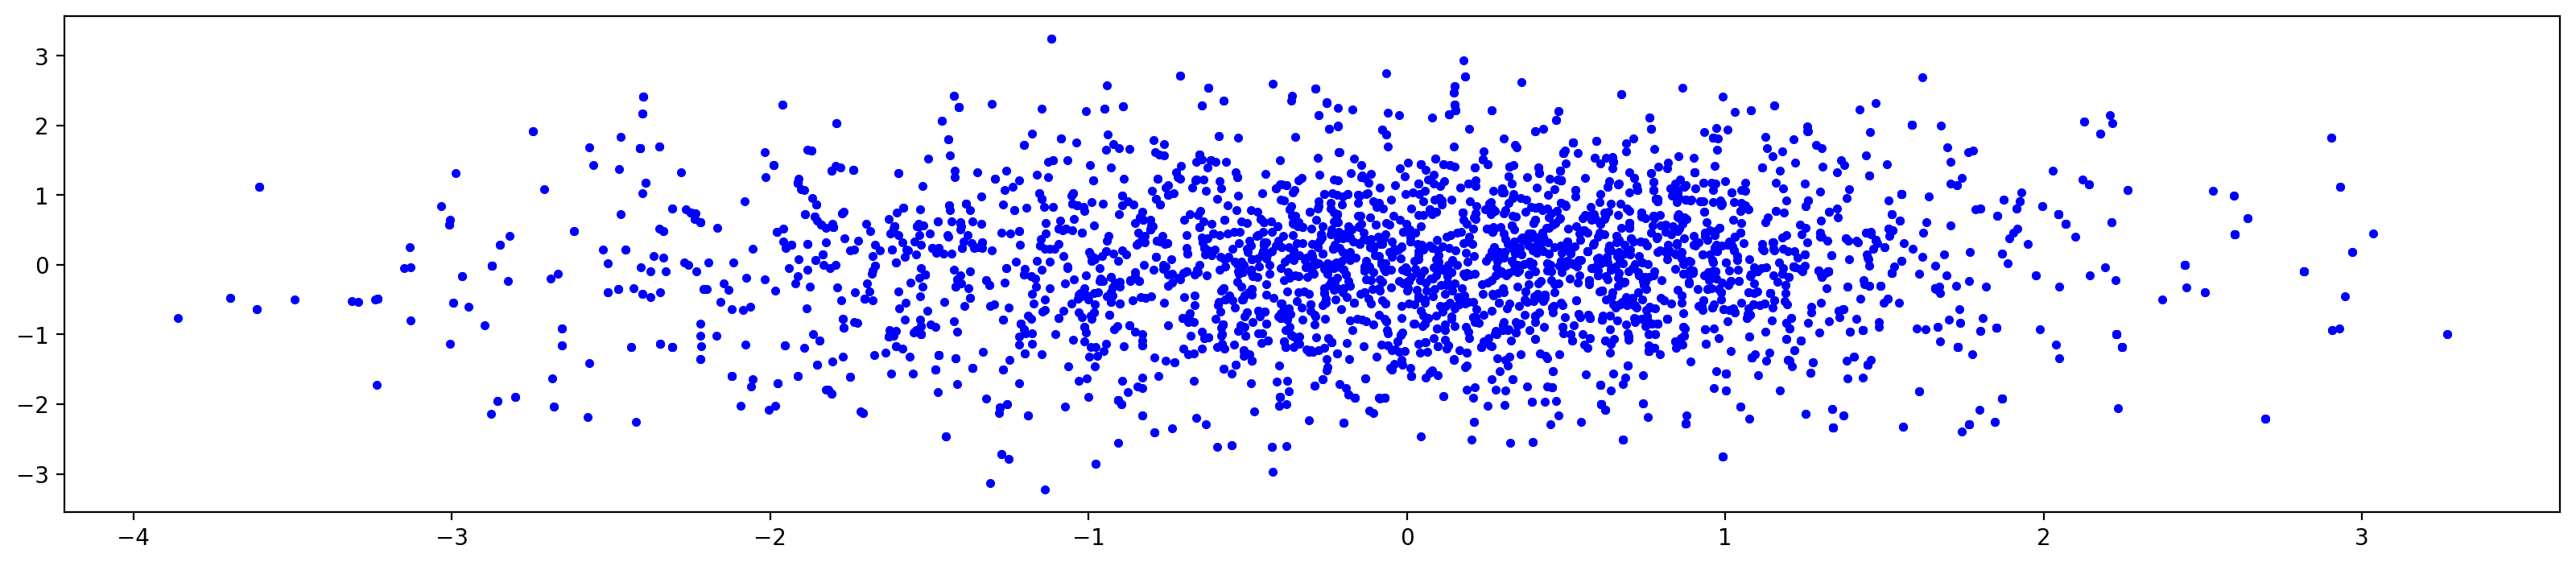

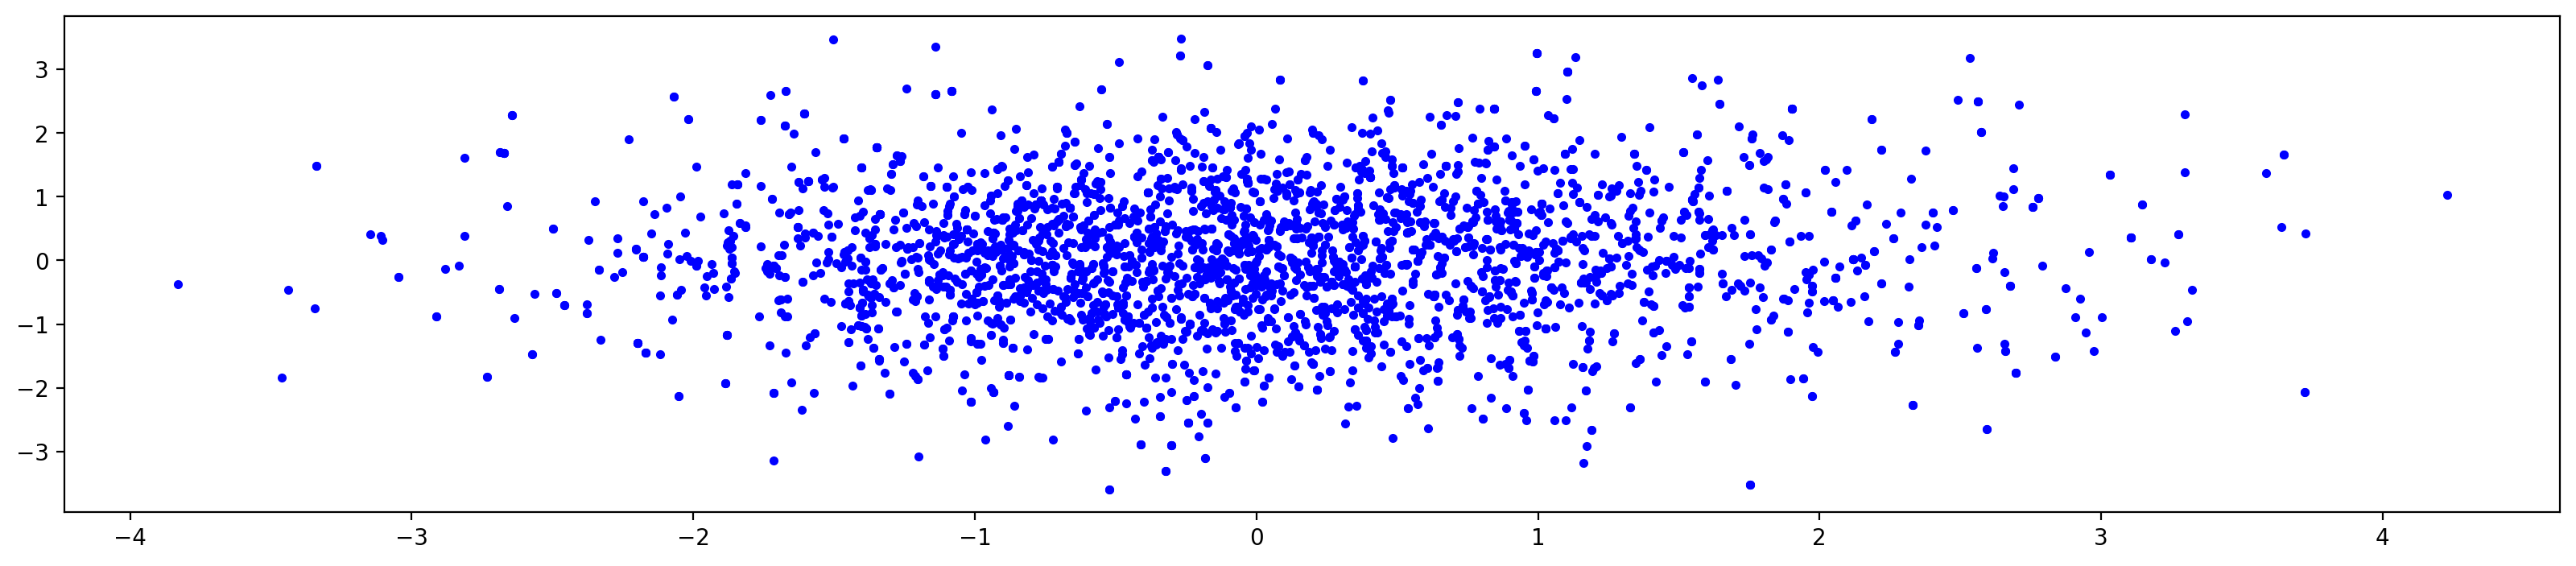

IndexError: index 4 is out of bounds for axis 1 with size 4

<Figure size 2000x400 with 0 Axes>

In [7]:
latentdata = autoencoder.encode(dataset.sequences)
sampling = np.array(latentdata[0])
print(sampling[:,0])

plt.figure(figsize=(20, 4))
plt.scatter(sampling[:,0], sampling[:,1], color='b', marker='.')
plt.show()

plt.figure(figsize=(20, 4))
plt.scatter(sampling[:,2], sampling[:,3], color='b', marker='.')
plt.show()

plt.figure(figsize=(20, 4))
plt.scatter(sampling[:,4], sampling[:,5], color='b', marker='.')
plt.show()

(3159, 912)


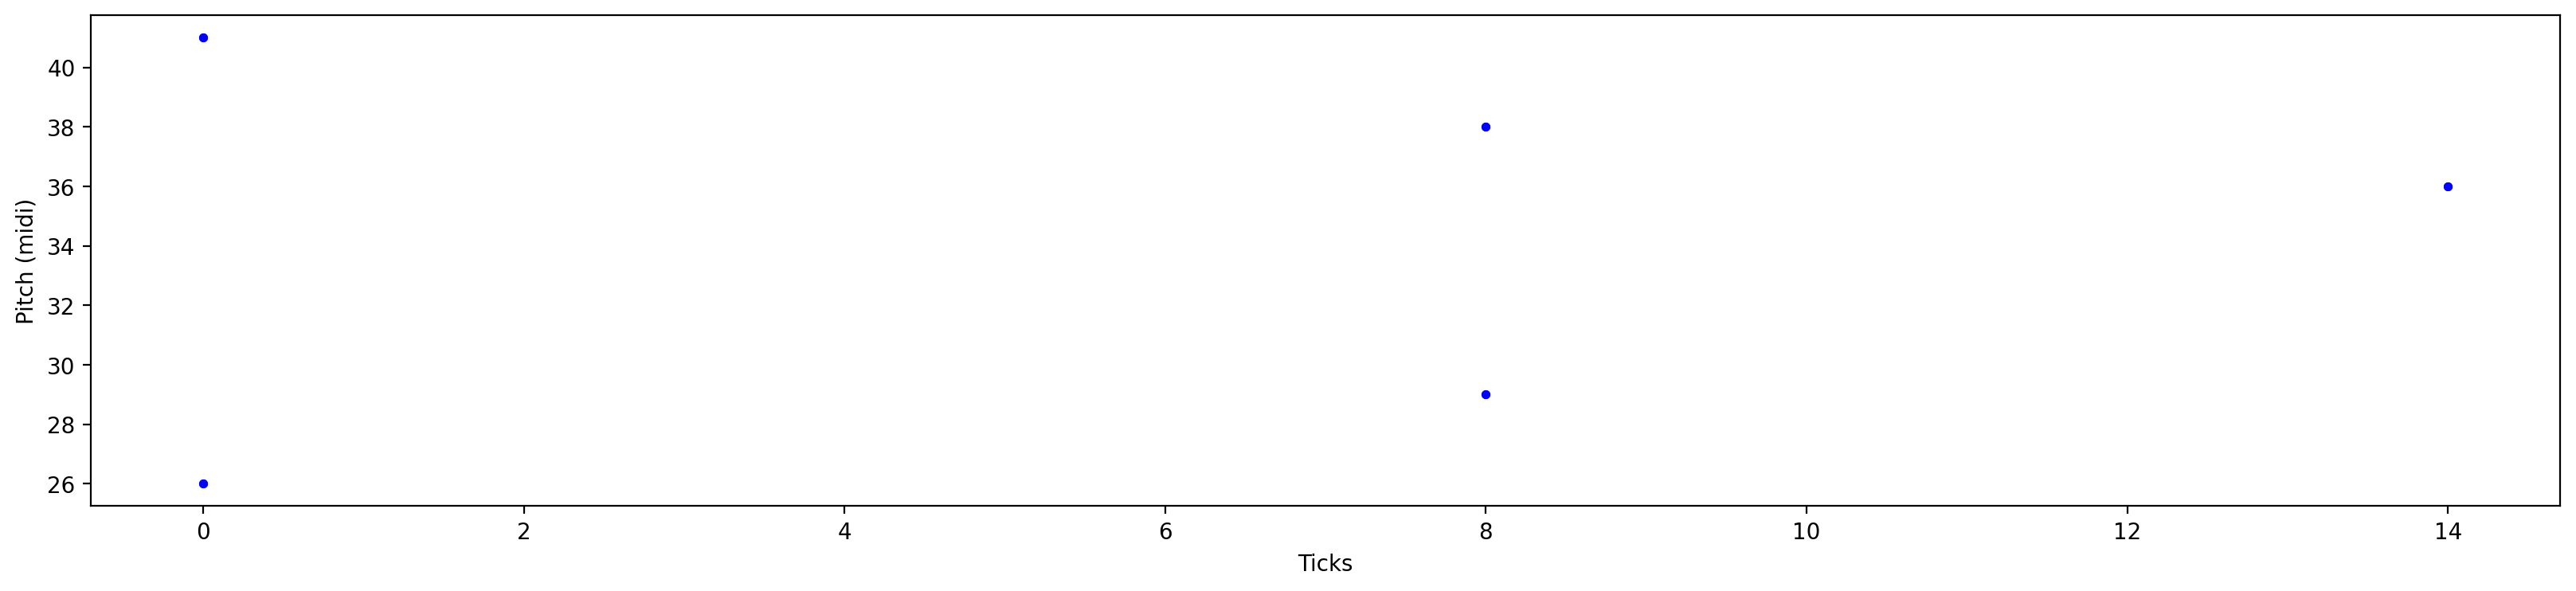

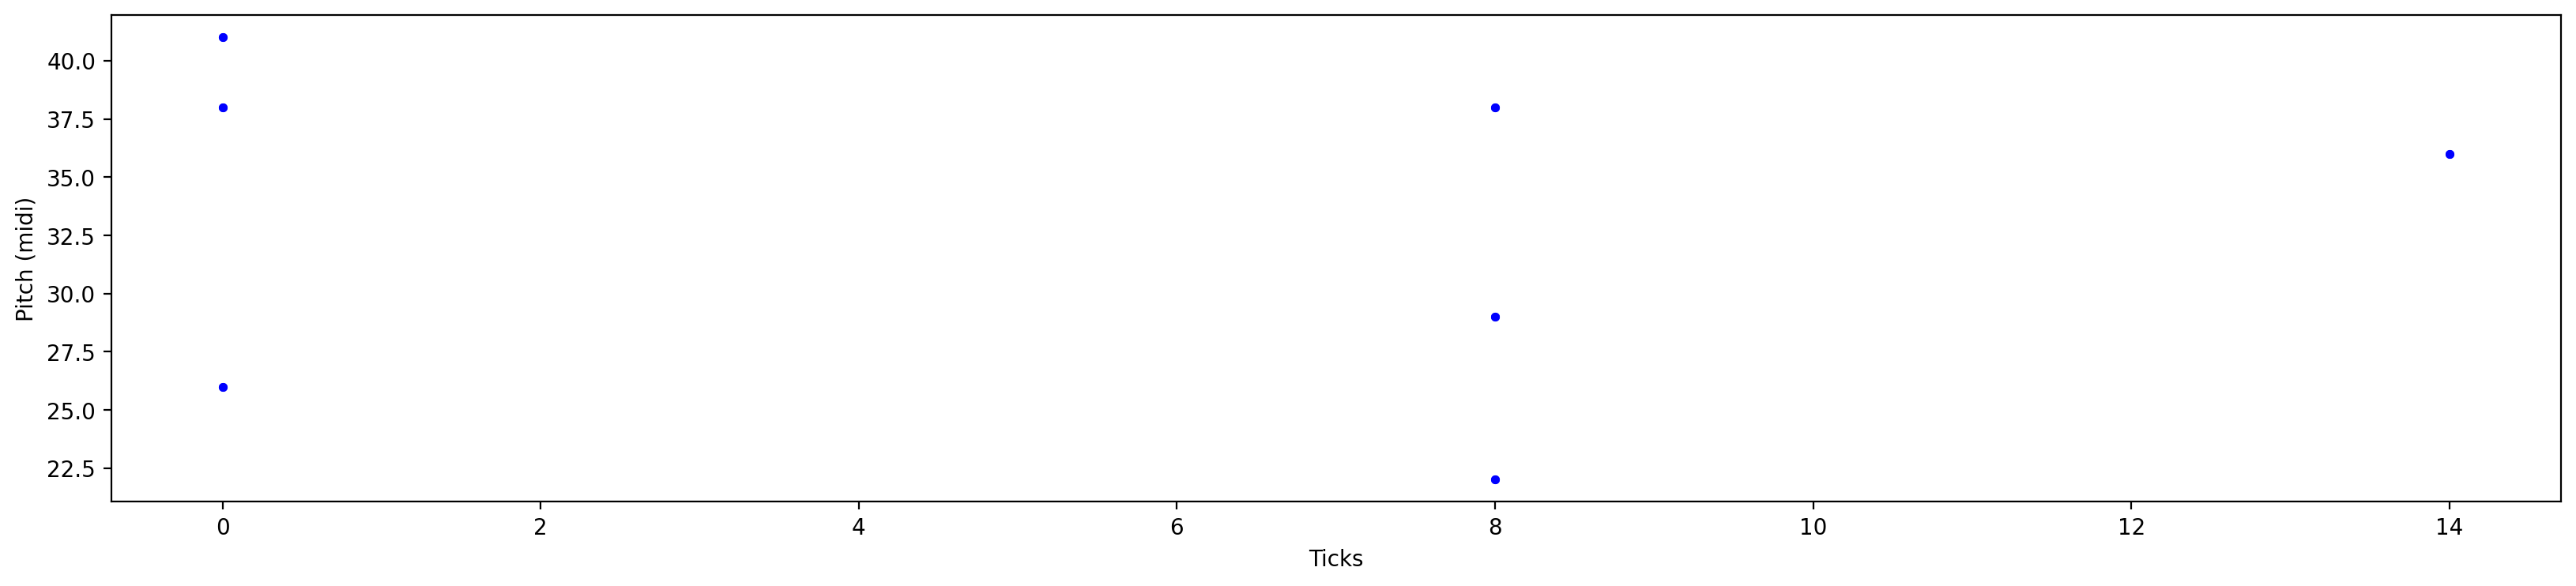

[0.8695698  0.95549023 0.8790424  ... 0.8929623  0.8418481  0.79855543]


In [14]:
index = 4

print(output.shape)


plotSparseNoteSequence(codec.decode(dataset.sequences[index:index+1])[0])
plotSparseNoteSequence(codec.decode(output[index:index+1])[0], threshold = 0.5)


print(np.amax(output, axis = 1))

### Save Model

In [9]:
autoencoder.save("../models", "mutopia_guitar_4-4")

TypeError: VariationalAutoEncoder.save() takes 1 positional argument but 3 were given